In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mgwr
import numpy as np
import pandas as pd
from libpysal import graph

from gwlearn.ensemble import GWRandomForestClassifier
from gwlearn.linear_model import GWLinearRegression, GWLogisticRegression
from gwlearn.search import BandwidthSearch


In [2]:
elections = gpd.read_file(
    "https://martinfleischmann.net/sds/autocorrelation/data/cz_elections_2023.gpkg"
)
elections = elections.set_index("name")
education = pd.read_csv(
    "https://martinfleischmann.net/sds/regression/data/education.csv"
)
elections_data = elections.merge(education, left_on="nationalCode", right_on="uzemi_kod")
independent_names = education.columns.drop(["uzemi_kod", "okres"])

In [3]:
sample = elections_data.sample(500)

X = sample[independent_names[1:]]
y = sample["PetrPavel"]

search_rf = BandwidthSearch(
    GWRandomForestClassifier,
    fixed=False,
    geometry=sample.centroid,
    search_method="interval",
    min_bandwidth=24,
    max_bandwidth=499,
    interval=25,
    verbose=True,
    metrics=['oob_score', 'prediction_rate']
)
search_rf = search_rf.fit(X, y > 50)


Bandwidth: 24.00, aicc: nan
Bandwidth: 49.00, aicc: nan
Bandwidth: 74.00, aicc: nan
Bandwidth: 99.00, aicc: 5759.057
Bandwidth: 124.00, aicc: 2334.828
Bandwidth: 149.00, aicc: 1733.491
Bandwidth: 174.00, aicc: 1519.102
Bandwidth: 199.00, aicc: 1532.752
Bandwidth: 224.00, aicc: 1332.568
Bandwidth: 249.00, aicc: 1295.797
Bandwidth: 274.00, aicc: 1322.760
Bandwidth: 299.00, aicc: 1242.840
Bandwidth: 324.00, aicc: 1422.609
Bandwidth: 349.00, aicc: 1468.161
Bandwidth: 374.00, aicc: 1285.225
Bandwidth: 399.00, aicc: 1515.161
Bandwidth: 424.00, aicc: 1467.643
Bandwidth: 449.00, aicc: 1593.228
Bandwidth: 474.00, aicc: 1541.272
Bandwidth: 499.00, aicc: 1547.028


<Axes: >

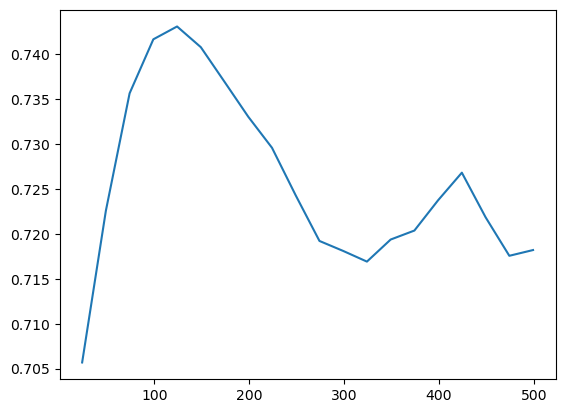

In [4]:
search_rf.metrics_.oob_score.plot()